# SVD image compression

In [1]:
using FundamentalsNumericalComputation

We make an image from some text, then reload it as a matrix.

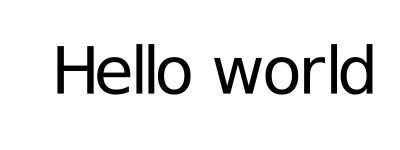

In [7]:
plot([],[],leg=:none,annotations=(0.5,0.5,text("Hello world",44,:center,:middle)),
    grid=:none,frame=:none,size=(400,150))
savefig("hello.png")
img = load("hello.png")
A = @. Float64(Gray(img))
m,n = size(A)

Gray.(A)

Next we show that the singular values decrease exponentially, until they reach zero (more precisely, until they are about $\epsilon_\text{mach}$ times the norm of the matrix). For all numerical purposes, this determines the rank of the matrix.

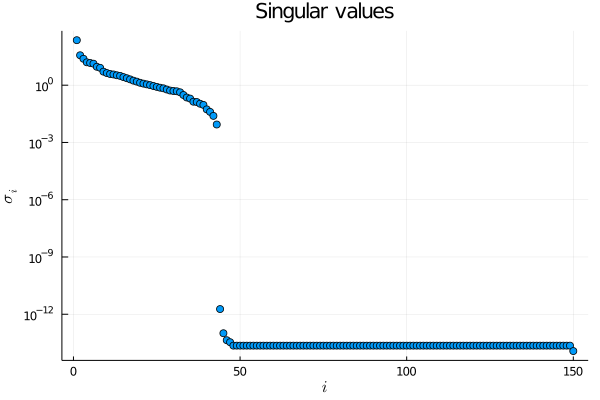

In [3]:
U,σ,V = svd(A)
scatter(σ,
    title="Singular values",xaxis=(L"i"), yaxis=(:log10,L"\sigma_i"),leg=:none )

In [4]:
r = findlast(@. σ/σ[1] > 10*eps())

44

The rapid decrease suggests that we can get fairly good low-rank approximations.

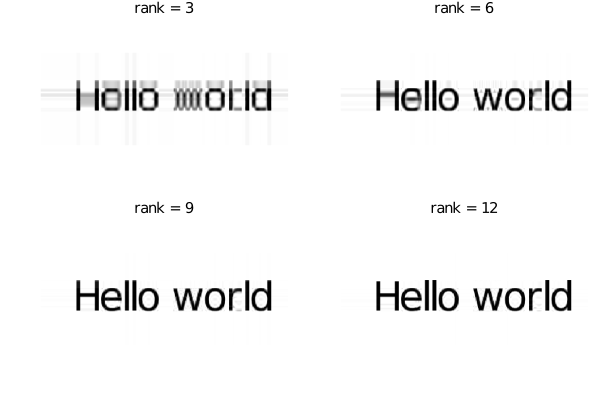

In [5]:
plt = plot(layout=(2,2),frame=:none,aspect_ratio=1,titlefontsize=10)
for i in 1:4
    k = 3i
    Ak = U[:,1:k]*diagm(σ[1:k])*V[:,1:k]'
    plot!(Gray.(Ak),subplot=i,title="rank = $k")
end
plt

Consider how little data is needed to reconstruct these images. For rank-9, for instance, we have 9 left and right singular vectors plus 89 singular values, for a compression ratio of better than 12:1.

In [8]:
compression = m*n / (9*(m+n+1))

12.099213551119178